In [1]:
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')

In [8]:
%%time
Eerr = {}
times = {}

rebxintegrators = ['rk2', 'rk4', 'euler', 'implicit_midpoint']

for rebxintegrator in rebxintegrators:
    filename = 'binaries/'+rebxintegrator
    print(filename)
    sa = reboundx.SimulationArchive(filename+'.sa', rebxfilename = filename+".rebx")
    sim, rebx = sa[0]
    P = sim.particles[1].P
    gr = rebx.get_force("gr")
    E0 = rebx.gr_hamiltonian(gr)
    
    Eerr[rebxintegrator], times[rebxintegrator] = np.zeros(sa.nblobs), np.zeros(sa.nblobs)
    for i, (sim, rebx) in enumerate(sa):
        E = rebx.gr_hamiltonian(rebx.get_force("gr"))
        Eerr[rebxintegrator][i] = np.abs((E-E0)/E0)
        times[rebxintegrator][i] = sim.t/P

binaries/rk2


/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/rebound/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


binaries/rk4
binaries/euler
binaries/implicit_midpoint
CPU times: user 2 s, sys: 315 ms, total: 2.31 s
Wall time: 2.31 s


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


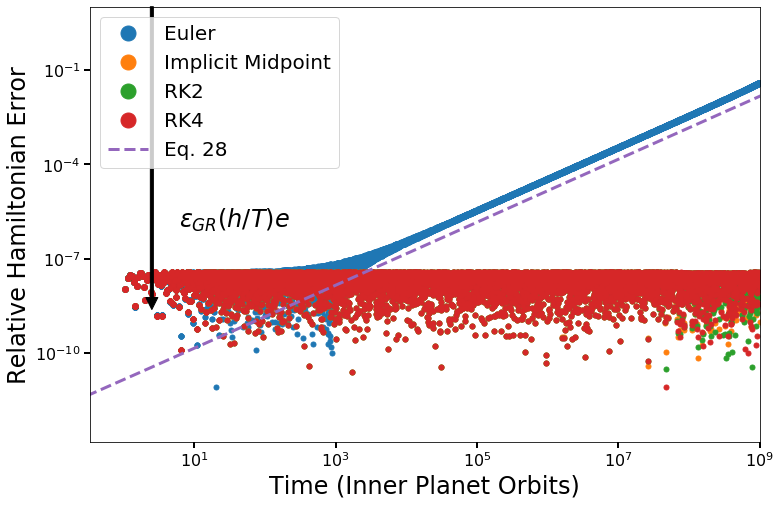

In [35]:
labels = {'euler':'Euler', 'rk2':'RK2', 'rk4':'RK4', 'implicit_midpoint':'Implicit Midpoint'}
rebxintegrators = ['euler','implicit_midpoint','rk2', 'rk4']

fig, ax = plt.subplots(figsize=(12,8))
for rebxintegrator in rebxintegrators:
    ax.plot(times[rebxintegrator], Eerr[rebxintegrator], '.', label=labels[rebxintegrator], rasterized=True)


ax.set_xscale('log')
ax.set_yscale('log')

plt.rcParams["text.usetex"] = False
plt.locator_params(axis='y', numticks=5)
#plt.locator_params(axis='x', numticks=8)

eps_GR = 3e-6
e=0.01
h=0.081
T=1
ax.plot(times['euler'], (2*np.pi)**2*eps_GR**2/2*(h/T)*(times['euler']/T), '--', label='Eq. 28')
ax.annotate(s='', xy=(2.5, eps_GR*(h/T)*e), xytext=(2.5, ax.get_ylim()[1]), arrowprops=dict(width=3, facecolor='black'))
ax.text(6, 1.e-6, r'$\epsilon_{GR}(h/T)e$', fontsize=24)

ax.legend(fontsize=20, loc='upper left', markerscale=3)
ax.set_xlabel('Time (Inner Planet Orbits)', fontsize=24)
ax.set_ylabel('Relative Hamiltonian Error', fontsize=24)
ax.set_xlim([0, 1e9])
fig.savefig("fig5.pdf", bbox_inches='tight')

## def k2137b(dtfactor, e):
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=0.463)
    sim.add(m=3.e-6, P=4.3/24/365.25, e=e)
    sim.move_to_com()
    sim.dt = dtfactor*sim.particles[1].P
    return sim

sim = k2137b(0.081, 0.01)
3*sim.G*sim.particles[0].m/sim.particles[1].a/63197.8**2*0.081*0.01

In [57]:
sa = reboundx.SimulationArchive('binaries/euler.sa', rebxfilename = 'binaries/euler.rebx')
sim0, rebx = sa[0]
P0 = sim0.particles[1].P

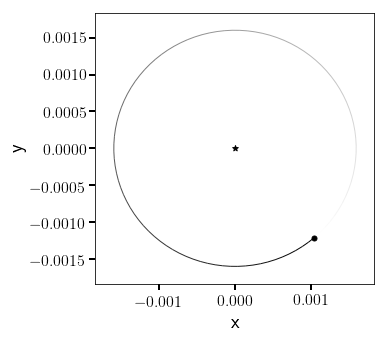

In [59]:
sim, rebx = sa.getSimulation(t=5.75e9*P0)
fig = rebound.OrbitPlot(sim)

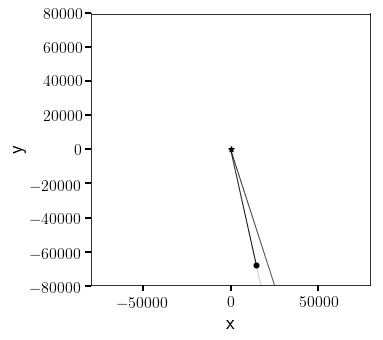

In [60]:
sim, rebx = sa.getSimulation(t=5.8e9*P0)
fig = rebound.OrbitPlot(sim)

In [68]:
integs = ['euler', 'rk2', 'rk4', 'implicit_midpoint']
for integ in integs:
    sa = reboundx.SimulationArchive('binaries/'+integ+'.sa', rebxfilename = 'binaries/'+integ+'.rebx')
    sim0, rebx = sa[0]
    P0 = sim0.particles[1].P
    sim, rebx = sa[-1]
    print(integ, sim.t/P0/1e9)

euler 13.38174196424918
rk2 9.5301099196866
rk4 6.322372617920943
implicit_midpoint 7.049930221739752
